# Code to simulate LMG Model
We have the following Hamiltonian
\begin{align}
H&=-\frac{J}{N}\sum_{i<j}\sigma_{i}^{z}\sigma_{j}^{z}+\gamma\sigma_{i}^{y}\sigma_{j}^{y}-\Gamma\sum_{i}\sigma_{i}^{x}
\end{align}
This reduces to (See ~/Dropbox/Research_Projects_Current/LMG_quench/LMG_quench.lyx),
\begin{equation}
H=-\frac{J}{2}\left(1+\gamma\left(2+\frac{N}{2}\right)\right)-\frac{J\left(2-\gamma\right)}{N}S_{z}^{2}+\frac{J\gamma}{2N}\left(S_{+}^{2}+S_{-}^{2}\right)-\Gamma\left(S_{+}+S_{-}\right)
\end{equation}
with the matrix elements,
\begin{align}
\left\langle S=\frac{N}{2},M\right|H\left|S=\frac{N}{2},M^{\prime}\right\rangle  & =\delta_{MM^{\prime}}\left[-\frac{J}{2}\left(1+\gamma\left(1+\frac{2S\left(S+1\right)}{N}\right)\right)-\frac{J\left(2-\gamma\right)}{N}M^{2}\right]+\nonumber \\
 & \ \ \ \delta_{MM^{\prime}-2}\left[\frac{J\gamma}{2N}\sqrt{\left(S\left(S+1\right)-\left(M+2\right)\left(M+1\right)\right)\left(S\left(S+1\right)-M\left(M+1\right)\right)}\right]+\nonumber \\
 & \ \ \ \delta_{MM^{\prime}+2}\left[\frac{J\gamma}{2N}\sqrt{\left(S\left(S+1\right)-\left(M-2\right)\left(M-1\right)\right)\left(S\left(S+1\right)-M\left(M-1\right)\right)}\right]+\nonumber \\
 & \ \ \ \delta_{MM^{\prime}-1}\left[-\Gamma\sqrt{\left(S\left(S+1\right)-M\left(M+1\right)\right)}\right]+\nonumber \\
 & \ \ \ \delta_{MM^{\prime}+1}\left[-\Gamma\sqrt{\left(S\left(S+1\right)-M\left(M-1\right)\right)}\right]
\end{align}

In [9]:
import numpy as np
from scipy import linalg as LA
import scipy.sparse.linalg as spla
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm 
from latex_envs.latex_envs import figcaption
import chardet
import os
import mod_LMG as LMG
import h5py
#for Latex font on figures
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Roman']})
rc('text', usetex=True)

In [10]:
os.environ["PYTHONPATH"]

KeyError: 'PYTHONPATH'

In [2]:
paramvals=LMG.Ham_params(N=10,S=50,J=1,γ=0.1,Γ=0)
Ham=LMG.LMG_generateHam(paramvals)
(Ham.transpose() == Ham).all() #check hermitian
#diagonalize
Energies,Eigenvecs=LA.eig(Ham) #full diagonalize
SEnergies,SEigenvecs=spla.eigs(Ham,k=1,which="SR")#sparse diagonalize
idx = Energies.argsort()  
Energies =Energies[idx]
Eigenvecs = Eigenvecs[:,idx]

(-49.207628913906916+0j)


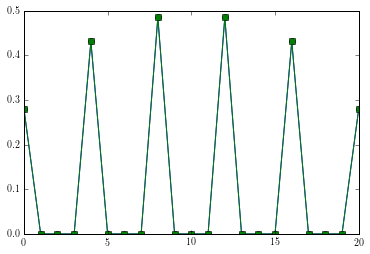

In [3]:
plt.plot(abs(Eigenvecs[:,0]),'-o')
plt.plot(abs(SEigenvecs[:,0]),'-s')
np.disp(Energies[0])

In [5]:
#calculate magnetization as a function of magnetic field
Γarr=np.linspace(0.,2,20)
Larr=np.arange(100,800,100)#choose even
magsqlist=np.ones([np.size(Γarr),np.size(Larr)])
for q in range(np.size(Larr)):
    L=Larr[q]
    for p in range(np.size(Γarr)):
        print([p,q], end='\r', flush=True)
        paramvals=LMG.Ham_params(N=L,S=L/2,J=1,γ=0.0,Γ=Γarr[p]) 
        Ham=LMG.LMG_generateHam(paramvals)
        GSenergy,vec=spla.eigs(Ham,k=1,which="SR")
        GState=vec[:,0]
        #Energies, Eigenvecs = LA.eig(Ham)
        #GSenergy=Energies[0]
        #GState=Eigenvecs[:,0]
        magsqlist[p,q]=LMG.magnetization2(GState,paramvals.N)


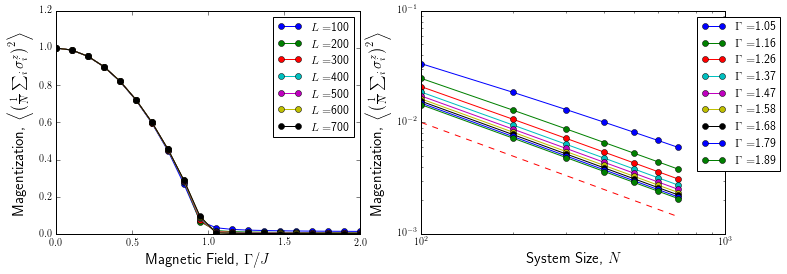

In [6]:
#plotting
α=1 
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(Γarr, magsqlist,'-o')
plt.ylim([0,1.2])
plt.xlabel("Magnetic Field, $\\Gamma/J$",fontsize=15)
plt.ylabel("Magentization, $\\left\\langle\\left(\\frac{1}{N}\\sum_i \\sigma^z_i\\right)^2\\right\\rangle$",fontsize=15)
leg = np.array(['$L=$%d' % p for p in Larr])
plt.legend(leg)
ax=plt.subplot(1,2,2)
plt.loglog(Larr,np.transpose(magsqlist[10:-1,:]),'-o')
plt.loglog(Larr,(Larr.astype(float))**(-α)*(float(Larr[0])**(α)*10**(-2)),'--')
#plt.ylim([0,1.2])
plt.xlabel("System Size, $N$",fontsize=15)
plt.ylabel("Magentization, $\\left\\langle\\left(\\frac{1}{N}\\sum_i \\sigma^z_i\\right)^2\\right\\rangle$",fontsize=15)
leg = np.array(['$\Gamma=$%0.2f' % p for p in Γarr[10:-1]])
plt.legend(leg,bbox_to_anchor=(1.2,1))
figcaption("(a) Magnetization as a function of magnetic field.(b) System size dependence of magnetization. It seems to agree with $N^{-\\alpha}$")

# $N^{1/3}$ dependence near the critical point.
Let us examine close to the critical point, $\Gamma=J$ and see if magnetization depends on $N^{1/3}$

In [38]:
#calculate magnetization as a function of magnetic field
Γarr=np.linspace(1,1.1,20)
Larr=np.concatenate([np.arange(100,1000,100),np.arange(1000,11000,1000)])#choose even
magsqlist=np.ones([np.size(Γarr),np.size(Larr)])
for q in range(np.size(Larr)):
    L=Larr[q]
    for p in range(np.size(Γarr)):
        print([p,q], end='\r', flush=True)
        paramvals=LMG.Ham_params(N=L,S=L/2,J=1,γ=0.0,Γ=Γarr[p]) 
        Ham=LMG.LMG_generateHam(paramvals)
        GSenergy,vec=spla.eigs(Ham,k=1,which="SR")
        GState=vec[:,0]
        #Energies, Eigenvecs = LA.eig(Ham)
        #GSenergy=Energies[0]
        #GState=Eigenvecs[:,0]
        magsqlist[p,q]=LMG.magnetization2(GState,paramvals.N)

KeyboardInterrupt: 

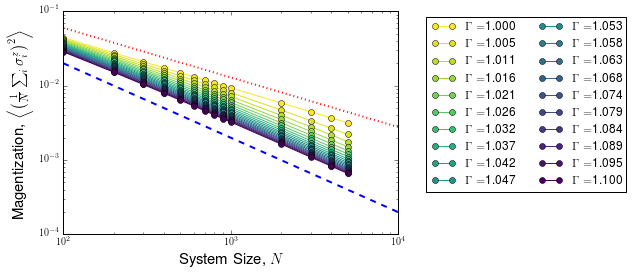

In [41]:
cmap=plt.cm.get_cmap('viridis_r')
colors = cmap(np.linspace(0,1,np.size(Γarr)))
for p in range(0,np.size(Γarr)):
    plt.loglog(Larr[0:14],np.transpose(magsqlist[p,0:14]),'-o',color=colors[p],label='$\Gamma=$%0.3f' % Γarr[p])
plt.loglog(Larr,(Larr.astype(float))**(-1)*(float(Larr[0])**(1)*(2*10**(-2))),'--',color='blue',linewidth=2)
plt.loglog(Larr,(Larr.astype(float))**(-2/3)*(float(Larr[0])**(2/3)*(6*10**(-2))),':',color='red',linewidth=2)
#plt.ylim([0,1.2])
plt.xlabel("System Size, $N$",fontsize=15)
plt.ylabel("Magentization, $\\left\\langle\\left(\\frac{1}{N}\\sum_i \\sigma^z_i\\right)^2\\right\\rangle$",fontsize=15)
#leg = np.array(['$\Gamma=$%0.2f' % p for p in Γarr])
plt.legend(bbox_to_anchor=(1.7,1),ncol=2)

In [37]:
np.concatenate([np.arange(100,1000,100),np.arange(1000,11000,1000)])

array([  100,   200,   300,   400,   500,   600,   700,   800,   900,
        1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000])

## Phase diagram as a function of the anisotropy.
We would like to recover the phase diagram as a function of the anisotropy parameter $\gamma$. The attempt is to reproduce the Fig.1 in PHYSICAL REVIEW E 78, 021106 (2008). There are four phases depending on the density of states. We would like to obtain for following parameters. In the paper, the Hamiltonian is defined as,
\begin{equation}
H=-\frac{1}{N}(\gamma_x S_x^2+\gamma_yS_y^2)-hS_z
\end{equation}
The different phases parameterized by ($\gamma_x,\gamma_y,h$) are identified as
$I\rightarrow(1/2,1/3,1)
II\rightarrow (2,1/2,1)
III\rightarrow (5,-3,1)
IV \rightarrow(5,3,1)$.

Translating to my notation, $\gamma_x\rightarrow 2J$, $\gamma_y\rightarrow 2J\gamma$, $h\rightarrow 2\Gamma$. And the energies are ofset by a constant $E_{PhysRevE}=E-\frac{J}{2}(1+\gamma)$. So we have the following phases,
\begin{enumerate}
\item $I\rightarrow (J=1/4,\gamma=2/3,\Gamma=1/2)$
\item $II\rightarrow (J=1,\gamma=1/4,\Gamma=1/2)$
\item $III\rightarrow (J=5/2,\gamma=-3/5,\Gamma=1/2)$
\item $IV\rightarrow (J=5/2,\gamma=3/5,\Gamma=1/2)$
\end{enumerate}

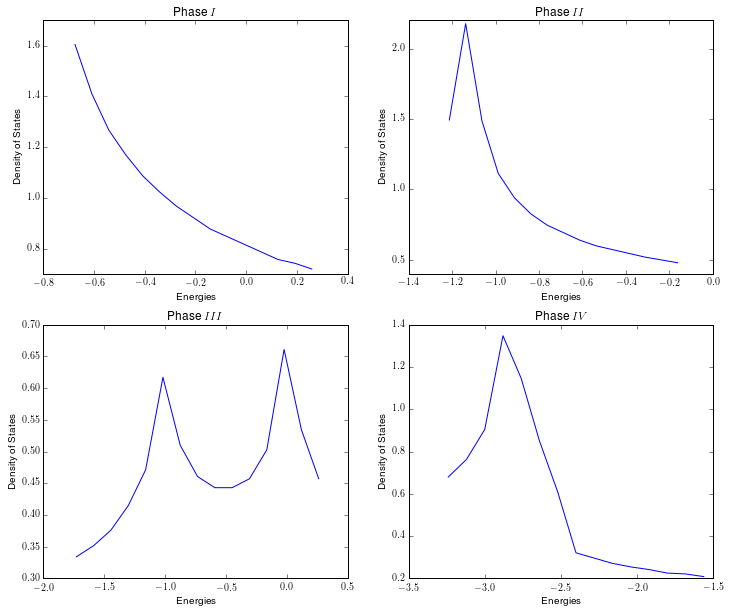

In [17]:
L=2000
plt.figure(figsize=[12,10])
#####Phase I
plt.subplot(2,2,1)
paramvals=LMG.Ham_params(N=L,S=L/2,J=1/4,γ=2/3,Γ=1/2)
Ham=LMG.LMG_generateHam(paramvals)
(Ham.transpose() == Ham).all() #check hermitian
#diagonalize
Energies,Eigenvecs=LA.eig(Ham) #full diagonalize
counts,bin_edges = np.histogram(np.real(Energies), bins=15)
bincenters = 0.5*(bin_edges[1:]+bin_edges[:-1])
energypersite=bincenters/L-1/8*(1+2/3)
plt.plot(energypersite,counts/(np.sum(counts)*np.abs(energypersite[1]-energypersite[2])),'-')
plt.title('Phase $I$')
plt.xlabel('Energies')
plt.ylabel('Density of States')
#####Phase II
plt.subplot(2,2,2)
paramvals=LMG.Ham_params(N=L,S=L/2,J=1,γ=1/4,Γ=1/2)
Ham=LMG.LMG_generateHam(paramvals)
(Ham.transpose() == Ham).all() #check hermitian
#diagonalize
Energies,Eigenvecs=LA.eig(Ham) #full diagonalize
counts,bin_edges = np.histogram(np.real(Energies), bins=15)
bincenters = 0.5*(bin_edges[1:]+bin_edges[:-1])
energypersite=bincenters/L-1/2*(1+1/4)
plt.plot(energypersite,counts/(np.sum(counts)*np.abs(energypersite[1]-energypersite[2])),'-')
plt.title('Phase $II$')
plt.xlabel('Energies')
plt.ylabel('Density of States')
#####Phase III
plt.subplot(2,2,3)
paramvals=LMG.Ham_params(N=L,S=L/2,J=5/2,γ=-3/5,Γ=1/2)
Ham=LMG.LMG_generateHam(paramvals)
(Ham.transpose() == Ham).all() #check hermitian
#diagonalize
Energies,Eigenvecs=LA.eig(Ham) #full diagonalize
counts,bin_edges = np.histogram(np.real(Energies), bins=15)
bincenters = 0.5*(bin_edges[1:]+bin_edges[:-1])
energypersite=bincenters/L-5/4*(1-3/5)
plt.plot(energypersite,counts/(np.sum(counts)*np.abs(energypersite[1]-energypersite[2])),'-')
plt.title('Phase $III$')
plt.xlabel('Energies')
plt.ylabel('Density of States')
#####Phase IV
plt.subplot(2,2,4)
paramvals=LMG.Ham_params(N=L,S=L/2,J=5/2,γ=3/5,Γ=1/2)
Ham=LMG.LMG_generateHam(paramvals)
(Ham.transpose() == Ham).all() #check hermitian
#diagonalize
Energies,Eigenvecs=LA.eig(Ham) #full diagonalize
counts,bin_edges = np.histogram(np.real(Energies), bins=15)
bincenters = 0.5*(bin_edges[1:]+bin_edges[:-1])
energypersite=bincenters/L-5/4*(1+3/5)
plt.plot(energypersite,counts/(np.sum(counts)*np.abs(energypersite[1]-energypersite[2])),'-')
plt.title('Phase $IV$')
plt.xlabel('Energies')
plt.ylabel('Density of States')

\subsection{Quench Protocol-I :Obtain time dependence of $S_z^2$}
We start with an initial state and initial Hamiltonian,
\begin{align}
|\psi_{0}\rangle&=\text{Ground state of H_0} \\
H_0&=\text{Far from the critical point, deep in the paramagnetic phase} 
\end{align}
In this section we set $\gamma=0$ to be concurrent with Mohammad's calculations. In order to translate to notation in Mohammad's calculation and (Phys. Rev. B 74, 144423) we need to make a transformation that is done in LMG_quench.lyx.  

For the numerics we choose the parameters,
\begin{itemize}
\item $H_0\rightarrow J_0=1$, $\gamma_0=0$, $\Gamma_0=4$.
\item $H_f\rightarrow J=1$, $\gamma=0$, $\Gamma=2,1.5,1.02$.
\end{itemize}

In [3]:
L=100 #Set system size.
paramvals0=LMG.Ham_params(N=L,S=L/2,J=1,γ=0.1,Γ=4)
paramvalsf=LMG.Ham_params(N=L,S=L/2,J=1,γ=0.1,Γ=1.02)
dt=0.2 #time step
Tf=20 # final time step
Nsteps=int(Tf/dt) 
tarr=np.arange(dt,Tf+dt,dt)

In [14]:
int('5')

5

In [4]:
#run this or load file
directory1='data/Sz2t/'
directory2='/home/paraj/Dropbox/Research_Projects_Current/LMG_Quench/data/Sz2t/'
filename=directory2+'Sz2t_[0_'+str(dt)+'_'+str(dt*Nsteps)+']_from_'+paramvals0.paramstr()+'_to_'+paramvalsf.paramstr()+'.hdf5'
if not os.path.exists(filename):
    #Initial state Ground state of the paramagnetic phase
    Ham0=LMG.LMG_generateHam(paramvals0)
    GSenergy,vec=spla.eigs(Ham0,k=1,which="SR")
    InitState=vec[:,0]
    display("Magnetization of initial state=%f"%LMG.magnetization2(InitState,L)) 
    display("Total $S_z^2$=%f"%LMG.Sz2(InitState,L))    
    #quench hamiltonian
    Hamf=LMG.LMG_generateHam(paramvalsf)
    U_dt=LA.expm(-1j*Hamf*dt)
    #time-evolved magnetization squared
    Sz2arr=np.zeros(Nsteps)
    Sz2arr=LMG.time_evolved_Sz2(InitState,Nsteps,U_dt,L)
    LMG.save_data_Sz2t(paramvals0,paramvalsf,Sz2arr,InitState,Nsteps,dt)
else:
    display("Loading file: "+filename)
    with h5py.File(filename, "r") as f:
        Sz2arr= f["Sz2arr"][...]
        InitState=f["InitState"][...]

'Loading file: data/Sz2t/Sz2t_[0_0.2_20.0]_from_L_100,S_50.0,J_1,Γ_4,γ_0.1_to_L_100,S_50.0,J_1,Γ_1.02,γ_0.1.hdf5'

In [6]:
#parameter defintions for analytical expressions
g0=paramvals0.Γ/paramvals0.J
gf=paramvalsf.Γ/paramvalsf.J
ω0=2*paramvals0.Γ*(1-1/g0)**0.5
ωf=2*paramvalsf.Γ*(1-1/gf)**0.5
ω0t=(1-1/g0)**0.5
ωft=(1-1/gf)**0.5
Sz2inf=(L/8)*(1/ω0t+(ω0t)/ωft**2)
Szt=(L/8)*((1/ω0t+(ω0t)/ωft**2)+(1/(ω0t)-(ω0t)/ωft**2)*np.cos(2*(ωf)*(np.linspace(0,Tf,1000))))

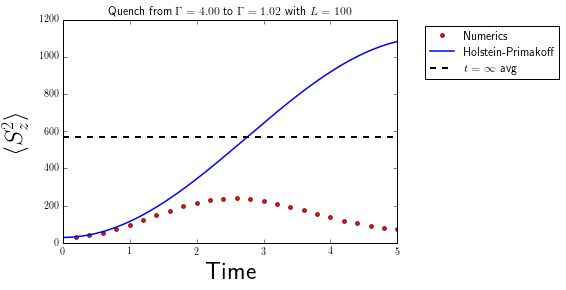

In [7]:
#plotting
plt.plot(tarr,Sz2arr,'o',color='red',markersize=4,label='Numerics')
plt.plot(np.linspace(0,Tf,1000),Szt,color='blue',label='Holstein-Primakoff',linewidth=1.5)
plt.axhline(Sz2inf,linestyle='dashed',color= 'black',label='$t=\\infty$ avg',linewidth=2)
plt.xlabel("Time",fontsize=25)
plt.ylabel("$\\langle S_z^2\\rangle$",fontsize=25)
plt.xlim(0,5)
plt.legend(numpoints=1,bbox_to_anchor=(1.5,1))
plt.title('Quench from $\\Gamma= %.2f $ to $\\Gamma= %.2f $ with $L=%d$'%(paramvals0.Γ, paramvalsf.Γ,L))
figname='/home/paraj/Dropbox/Research_Projects_Current/LMG_Quench/plots/Sz2t_[0_'+str(dt)+'_'+str(Tf)+']_from_'+paramvals0.paramstr()+'to'+paramvalsf.paramstr()+'.pdf'

plt.savefig(figname,bbox_inches="tight")

# $L$ dependence of the time-averaged-$\langle S_z^2\rangle$
Here we discuss the dependence on system size of the time-averaged correlator. Basically, regardless of what the quench parameter is the analytical solution using H-P approximation should get better for larger system size. Let us verify this claim.

In [15]:
Larr=np.concatenate([np.arange(100,1000,100),np.arange(1000,10000,1000)]) #Set system size.
dt=0.2 #time step
Tf=20 # final time step
Nsteps=int(Tf/dt) 
tarr=np.arange(dt,Tf+dt,dt)

In [14]:
Sz2vals=np.zeros((Nsteps,np.size(Larr)))
for L,p in zip(Larr,range(np.size(Larr))):
    paramvals0=Ham_params(N=L,S=L/2,J=1,γ=0,Γ=4)
    paramvalsf=Ham_params(N=L,S=L/2,J=1,γ=0,Γ=1.02)
    #Initial state Ground state of the paramagnetic phase
    Ham0=LMG_generateHam(paramvals0)
    GSenergy,vec=spla.eigs(Ham0,k=1,which="SR")
    InitState=vec[:,0]
    #quench hamiltonian
    Hamf=LMG_generateHam(paramvalsf)
    U_dt=LA.expm(-1j*Hamf*dt)
    #time-evolved magnetization squared
    Sz2vals[:,p]=time_evolved_Sz2(InitState,Nsteps,U_dt)
    print('L='+str(L), end='\r', flush=True)

KeyboardInterrupt: 

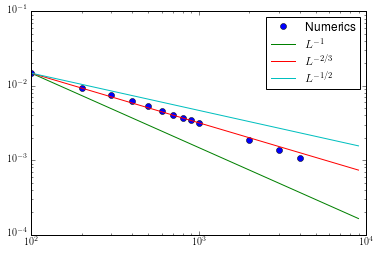

In [29]:
#Plot average magnetization as a function of L
#Analytical formulae
g0=paramvals0.Γ/paramvals0.J
gf=paramvalsf.Γ/paramvalsf.J
ω0=2*paramvals0.Γ*(1-1/g0)**0.5
ωf=2*paramvalsf.Γ*(1-1/gf)**0.5
ω0t=(1-1/g0)**0.5
ωft=(1-1/gf)**0.5
Sz2infarr=(1/8)*(1/ω0t+(ω0t)/ωft**2)*Larr
##numerical formulae
Sztavg=np.mean(Sz2vals, axis=0)
#plt.loglog(Larr,np.divide(np.abs(Sz2infarr-Sztavg),(Sz2infarr)),'o')
plt.figure()
plt.loglog(Larr,np.divide(Sztavg,Larr**2),'o',label='Numerics')
plt.loglog(Larr,np.divide(Sztavg,Larr**2)[0]*Larr[0]/Larr,'-',label='$L^{-1}$')
plt.loglog(Larr,np.divide(Sztavg,Larr**2)[0]*(Larr[0]/Larr)**(2/3),'-',label='$L^{-2/3}$')
plt.loglog(Larr,np.divide(Sztavg,Larr**2)[0]*(Larr[0]/Larr)**(1/2),'-',label='$L^{-1/2}$')
plt.ylabel('$\overline{\langle S_z^2(t)\rangle$}',fontsize=25)
plt.xlabel('Syste Size, L',fontsize=25)
plt.legend(loc=1,numpoints=1)

In [256]:
np.size(time_evolved_Sz2(InitState,Nsteps,U_dt))

200

In [9]:
Sz2vals[:,0]=time_evolved_Sz2(InitState,Nsteps,U_dt)

In [11]:
np.divide([1,2,3],[4,5,6])

array([0.25, 0.4 , 0.5 ])

In [20]:
 isinstance(figname, str)

True

In [17]:
figname

'/home/paraj/Dropbox/Research_Projects_Current/LMG_Quench/plots/1Sz2t_[0:0.2:20]_from_L_100,S_50.0,J_1,Γ_4,γ_0toL_100,S_50.0,J_1,Γ_1.02,γ_0.pdf'

In [23]:
encoding = chardet.detect("AA")
encoding['encoding']

ValueError: Expected a bytes object, not a unicode object

In [2]:
LMG.save_data_Sz2t()